# Generative AI and Prompt Engineering
## A program by IISc and TalentSprint
### Mini-Project: Spam Classification

## Problem Statement

Generating a prompt / prompts using no code based LLMs to solve a text classification problem.

Dataset: Spam / ham classification

## Learning Objectives

At the end of the mini-project, you will be able to :

* Understand how to successfuly generate code using LLMs

* Following sections will help you understand the various steps required for text classification:
  * Create text vectorization layer.
  * Create embeddings of words in the message.
  * Visualize the different categories of words.
  * Build a model to classify the messages as Spam or Ham.
  * Get the evaluation score of the model.

## Dataset

The SMS Spam Collection is a set of SMS tagged messages that have been collected for SMS Spam research. It contains one set of SMS messages in English of 5,574 messages, tagged acording being ham (legitimate) or spam.

Link: https://www.kaggle.com/datasets/uciml/sms-spam-collection-dataset

## Instructions

* Use the SMS Spam collection dataset.
* Based on your understanding of steps required to do text classification from previous assignments, generate the code using LLM to accomplish the task.
* There is no restriction on the number of prompts or choice of LLM.
* Do not use a pretrained model.
* Use any LLM to pass prompts and generate code from it.
* All the sections are to be solved by making use of prompts.
* Feel free to add/delete ccode cells as you may require.
* Use any number of code cells/prompts to solve any particular section.

## Parameters of evaluations

* Accuracy on Test data set
* Choice of preprocessing steps
* Model Architecture
* Design parameters choice
* Number of experiments conducted
* Parameter tuning
* Visualizations
  * Train validation loss & other metrics
  * Word clouds of words in each category
  * Embeddings visualizations


## **HINT**

Please take hints from the assignment released in module 1, **[M1_AST_02_TextVectorization_and_Embedding_Layers](https://drive.google.com/drive/folders/17J8eaehDycpqypduEcmUyubyXlFr-gD2?usp=drive_link)**

## Grading = 10 Points

## **Submission: Prompt for generating a Text Spam Classifier**
### Tool used: Gpt-4o from Poe.com
### Prompt is given one by one and then code generated is pasted here in each cell below.

In [ ]:
# prompt: Create a hidden code cell with @#title Download the Dataset. Data should be downloaded from the following link: https://cdn.exec.talentsprint.com/static/aimlops/c3/spam.csv

#@title Download the Dataset
!wget https://cdn.exec.talentsprint.com/static/aimlops/c3/spam.csv


--2024-08-31 05:11:20--  https://cdn.exec.talentsprint.com/static/aimlops/c3/spam.csv
Resolving cdn.exec.talentsprint.com (cdn.exec.talentsprint.com)... 172.105.52.210
Connecting to cdn.exec.talentsprint.com (cdn.exec.talentsprint.com)|172.105.52.210|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 503663 (492K) [application/octet-stream]
Saving to: ‘spam.csv.1’

spam.csv.1          100%[===================>] 491.86K   389KB/s    in 1.3s    

2024-08-31 05:11:22 (389 KB/s) - ‘spam.csv.1’ saved [503663/503663]



### Import Neccesary Packages

In [ ]:
# Please feel free to add/remove installations here

# Initial Packages
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

### Read the Data (1 point)

In [ ]:
## Add your prompt and code here

In [ ]:
# prompt: Prompt: Load the dataset from the CSV file and display the first few rows, delete the unnamed columns and rename column v1 as label and v2 as text

# Load the dataset
df = pd.read_csv('spam.csv', encoding='latin-1')

# Display first few rows
df.head()

# Drop unnecessary columns
df = df.drop(['Unnamed: 2', 'Unnamed: 3', 'Unnamed: 4'], axis=1)

# Rename columns
df = df.rename(columns={'v1': 'label', 'v2': 'text'})

# Display the modified DataFrame
df.head()


,label,text
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


### Apply the Vectorization (1 point)

In [ ]:
## Add your prompt and code here

In [ ]:
# prompt: Prompt: Use a text vectorization method (e.g., CountVectorizer or TfidfVectorizer) to transform the text data into numerical format.
from sklearn.feature_extraction.text import CountVectorizer

vectorizer = CountVectorizer()
X = vectorizer.fit_transform(df['text'])
y = df['label'].map({'ham': 0, 'spam': 1})


### Design the Model (1 point)

In [ ]:
# prompt: Prompt: Build a simple neural network model using Keras for classifying the messages.

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

# Build a simple neural network model
model = Sequential()
model.add(Dense(128, activation='relu', input_shape=(X.shape[1],)))
model.add(Dense(1, activation='sigmoid'))  # Output layer for binary classification

# Compile the model
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


### Extract the Embeddings before Training (1 point)

In [ ]:
# prompt: Prompt: Extract and display the embeddings from the model before training

# Assuming you want to extract embeddings from the first Dense layer
embeddings = model.layers[0].get_weights()[0]

# You can now visualize or analyze these embeddings
print(embeddings.shape)  # Shape of the embedding matrix
# ... further analysis or visualization as needed


(8672, 128)


### Train the Model (1 point)

In [ ]:
# prompt: Prompt: Split the data into training and test dataset and train the model
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
history = model.fit(X_train, y_train, epochs=10, batch_size=32, validation_data=(X_test, y_test))

Epoch 1/10
140/140 ━━━━━━━━━━━━━━━━━━━━ 3s 14ms/step - accuracy: 0.8898 - loss: 0.3906 - val_accuracy: 0.9821 - val_loss: 0.0908
Epoch 2/10
140/140 ━━━━━━━━━━━━━━━━━━━━ 2s 12ms/step - accuracy: 0.9926 - loss: 0.0422 - val_accuracy: 0.9821 - val_loss: 0.0735
Epoch 3/10
140/140 ━━━━━━━━━━━━━━━━━━━━ 3s 18ms/step - accuracy: 0.9993 - loss: 0.0126 - val_accuracy: 0.9803 - val_loss: 0.0781
Epoch 4/10
140/140 ━━━━━━━━━━━━━━━━━━━━ 2s 16ms/step - accuracy: 0.9999 - loss: 0.0051 - val_accuracy: 0.9794 - val_loss: 0.0861
Epoch 5/10
140/140 ━━━━━━━━━━━━━━━━━━━━ 2s 12ms/step - accuracy: 1.0000 - loss: 0.0027 - val_accuracy: 0.9803 - val_loss: 0.0922
Epoch 6/10
140/140 ━━━━━━━━━━━━━━━━━━━━ 2s 11ms/step - accuracy: 1.0000 - loss: 0.0017 - val_accuracy: 0.9803 - val_loss: 0.0959
Epoch 7/10
140/140 ━━━━━━━━━━━━━━━━━━━━ 3s 13ms/step - accuracy: 1.0000 - loss: 0.0013 - val_accuracy: 0.9803 - val_loss: 0.0994
Epoch 8/10
140/140 ━━━━━━━━━━━━━━━━━━━━ 2s 12ms/step - accuracy: 1.0000 - loss: 8.6792e-04 - val_

### During Training Collect the loss and Metrics of Train and Validation. Plot the Metrics after Training (1 point)

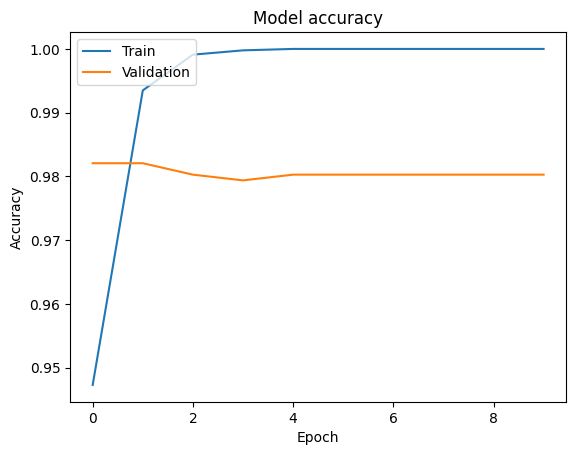

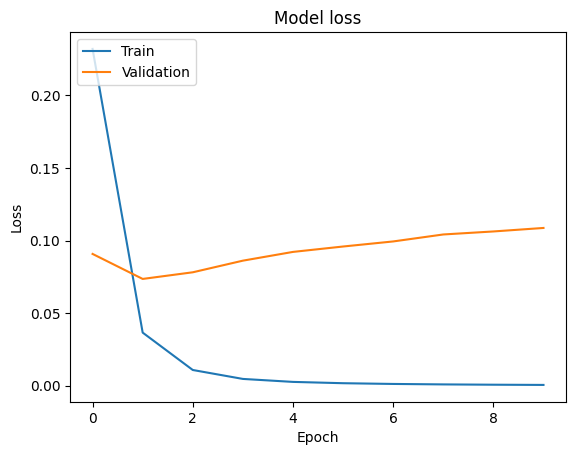

In [ ]:
# prompt: Plot the training and validation loss and accuracy after training

# Plot training & validation accuracy values
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

# Plot training & validation loss values
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()


### Calculate and Display the Test Performance (1 point)

In [ ]:
#prompt: Prompt: Evaluate the model on the test dataset and display the accuracy

test_loss, test_accuracy = model.evaluate(X_test, y_test)
print(f'Test Accuracy: {test_accuracy:.2f}')


35/35 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9864 - loss: 0.0581
Test Accuracy: 0.98


### Extract the Embeddings after Training (1 point)

In [ ]:
# prompt: PromptLExtract and display the embeddings from the model after training

# Assuming you want to extract embeddings from the first Dense layer
embeddings_after_training = model.layers[0].get_weights()[0]

# You can now visualize or analyze these embeddings
print(embeddings_after_training.shape)  # Shape of the embedding matrix


(8672, 128)


### Reduce the Embeddings using PCA (1 point)

In [ ]:
# prompt: Use PCA to reduce the dimensionality of the embeddings for visualization.

from sklearn.decomposition import PCA

pca = PCA(n_components=2)
reduced_embeddings = pca.fit_transform(embeddings)



### Plot the Embeddings in 2D (1 point)

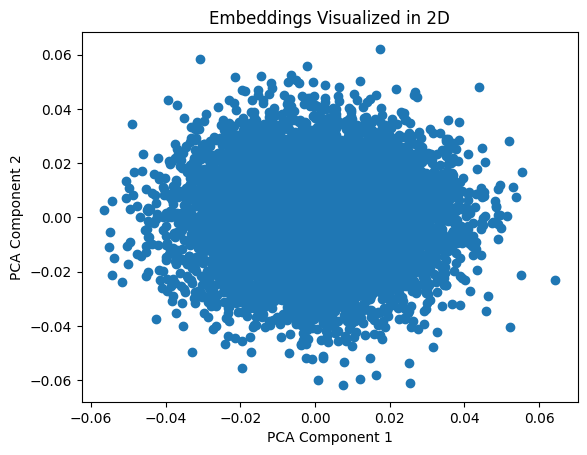

In [ ]:
# prompt: Prompt: Plot the reduced embeddings in a 2D scatter plot

plt.scatter(reduced_embeddings[:, 0], reduced_embeddings[:, 1])
plt.title('Embeddings Visualized in 2D')
plt.xlabel('PCA Component 1')
plt.ylabel('PCA Component 2')
plt.show()
